## Import libraries

In [10]:
import re
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import model_from_json

## Load Data

Download newsheadline from Reddit [https://www.reddit.com/r/worldnews/?hl=]

In [11]:
df = pd.read_csv('../Data/dailynews.csv', header=None)
df = df[:1]
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,London Bridge victim's father condemns 'beyond...,Grandmother dumps burnt remains of home at Aus...,Facebook rejects twice a swiss companies' ad o...,\nHong Kong\nChina accused UN human rights chi...,Hong Kong protests: over 380K people rally in ...,You Raped Me When I Was 14!' Yazidi Survivor C...,UK police won't pursue case against Prince And...,Scientist who helped develop new drug for ovar...,China bans US military visits to Hong Kong in ...,Neo-Nazi scandal hits German elite military un...,...,Hong Kong Democracy Slogans Heard at Mainland ...,Thousands took to the streets across Poland on...,Hong Kong cop who drove motorbike into protest...,China Targets Uighur Mosques to Eradicate Mino...,World approaching ‘point of no return’ on clim...,Calls grow to fire University of Alberta lectu...,Iranian officials 'stealing bodies' from morgu...,Samoa measles outbreak: Death toll rises to 53...,"Six Muslim men sentenced to jail, fine for goi...",Labour leader Corbyn would stop arms sales to ...


## Preprocessing

### Raw text

In [12]:
headlines = []
for row in range(0, len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row, 0:24]))
string = ''.join(headlines)
string

'London Bridge victim\'s father condemns \'beyond disgusting\' Boris Johnson for using son\'s death for political gain - \'Don’t use my son’s death to promote your vile propaganda. Jack stood against everything you stand for\' Grandmother dumps burnt remains of home at Australian Parliament House in climate change protest Facebook rejects twice a swiss companies\' ad of two men kissing to spread awareness on world-aids day \nHong Kong\nChina accused UN human rights chief of “inappropriate” interference in the country’s affairs after she called for investigations into alleged police brutality in Hong Kong. Hong Kong protests: over 380K people rally in Hong Kong You Raped Me When I Was 14!\' Yazidi Survivor Confronts ISIS Prisoner Who Assaulted Her UK police won\'t pursue case against Prince Andrew or Ghislaine Maxwell Scientist who helped develop new drug for ovarian cancer donates all profits to charity China bans US military visits to Hong Kong in response to the HK Human Rights Act N

### Clean Text 

In [13]:
string = string.lower()
string = re.sub(r'[^\w\s]', ' ', string) # remove punctuation
string = ' '.join([w for w in string.split() if len(w) >= 3])
string

'london bridge victim father condemns beyond disgusting boris johnson for using son death for political gain don use son death promote your vile propaganda jack stood against everything you stand for grandmother dumps burnt remains home australian parliament house climate change protest facebook rejects twice swiss companies two men kissing spread awareness world aids day hong kong china accused human rights chief inappropriate interference the country affairs after she called for investigations into alleged police brutality hong kong hong kong protests over 380k people rally hong kong you raped when was yazidi survivor confronts isis prisoner who assaulted her police won pursue case against prince andrew ghislaine maxwell scientist who helped develop new drug for ovarian cancer donates all profits charity china bans military visits hong kong response the human rights act neo nazi scandal hits german elite military unit the bundeswehr set suspend officer elite military unit over suspec

## News Headline Visulizaiton

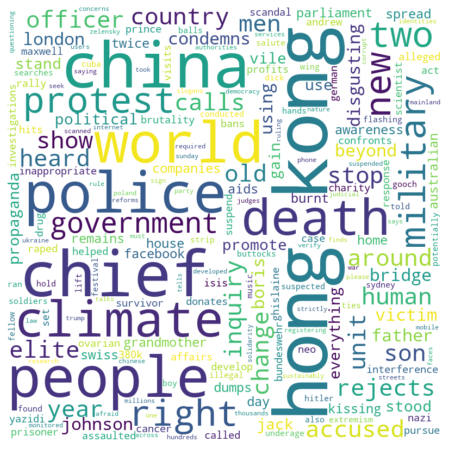

In [14]:
stop1 = stopwords.words("english")
stop = stop1
stop_words = set(stop)
wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stop_words, 
                min_font_size=10).generate(string)
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Word Embedding

### Load TFIDF Model

In [15]:
tfidf = pickle.load(open("../Model/tfidf1.pkl", 'rb'))
vectorizer = TfidfVectorizer(min_df=0.04, max_df=0.3, max_features=200000,
                                     ngram_range=(2, 2), vocabulary=tfidf.vocabulary_)

### Vectorize Newsheadlines

In [16]:
X_tfidf = vectorizer.fit_transform([string])
X_tfidf = X_tfidf.toarray()
X_tfidf

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11396058, 0.        , 0.11396058,
        0.        , 0.22792115, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.22792115, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11396058, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

## Prediction

### Load Deep learning model

In [17]:
json_file = open('../Model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../Model/model.h5")

### Predict DJIA Increase [1] or Decrease [0]

In [18]:
print("Prediction Result for DJIA", loaded_model.predict_classes(X_tfidf, verbose=0))

Prediction Result for DJIA [1]
